In [1]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
import sys
import os

sys.path.append(os.path.abspath("/Users/dilankaraguler/Desktop/ConwayProject/src"))

import gameoflife as gol

In [3]:
sys.path.append(os.path.abspath("/Users/dilankaraguler/Desktop/ConwayProject/src"))

import visual 
from visual import simulator

Questions?
- how the starting density affecting the spread?
- Is there a convergence in the result?
- how the starting shape affecting the spread?

Rules:
 - Any live cell with fewer than two live neighbours dies, as if by underpopulation.
 - Any live cell with two or three live neighbours lives on to the next generation.
 - Any live cell with more than three live neighbours dies, as if by overpopulation.
 - Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.

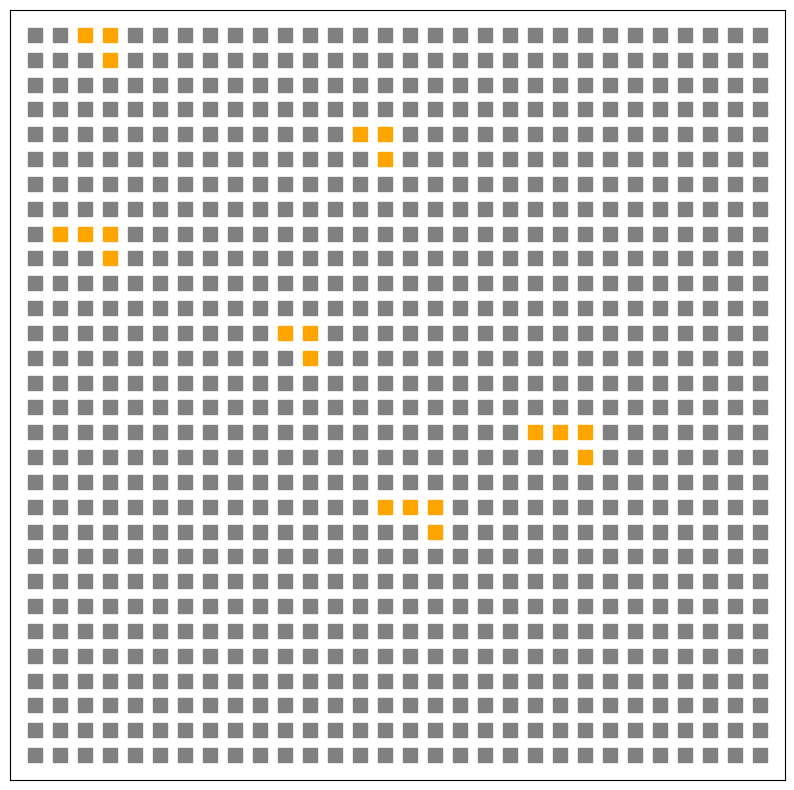

Number of iterations and fraction on a sqaure board at the end is : (35, 0.023333333333333334)


In [4]:
density = 0.45
board_size = 30

iterations = simulator(board_size=board_size, density=density, plot=True)

print("Number of iterations and fraction on a sqaure board at the end is :", iterations)

In [7]:
#Create datasets 
board_sizes = np.arange(20,60,10)
range_frac = np.arange(0.01,1,0.01)

directory = "/Users/dilankaraguler/Desktop/ConwayProject/data"
board_types = ['square','sphere','torus']
#for board in board_types:
#    result_array = []
#    for board_size in board_sizes:
#        for fraction in range_frac:
#            
#            num_iter , end_frac  = simulator(board_size = board_size, density =fraction,type = board , plot=False)
#            result_array.append([board_size , fraction, end_frac, num_iter])

#    data = np.array(result_array)

#    filename = f"project_data_{board}.csv"

#    output_path = os.path.join(directory, filename)
#    np.savetxt(output_path, data, delimiter=",", header="Board Size,Fraction,End Fraction,Num Iter", comments="", fmt='%.6f')


In [22]:
column_names = ["BoardSize", "InitialFraction", "EndFraction", "Iterations"]
data_dict = {}
pd.options.display.float_format = '{:.4f}'.format
for board in board_types:
    file_path = f'/Users/dilankaraguler/Desktop/ConwayProject/data/project_data_{board}.csv'
    data_dict[board] = pd.read_csv(file_path, delimiter=',', names=column_names, skiprows=1)
    data_dict[board]['EndFraction'] *= 10

data_dict['square'].head()

,BoardSize,InitialFraction,EndFraction,Iterations
0,20.0000,0.0100,0.0000,2.0000
1,20.0000,0.0200,0.0000,2.0000
2,20.0000,0.0300,0.0750,7.0000
3,20.0000,0.0400,0.0000,6.0000
4,20.0000,0.0500,0.0000,5.0000


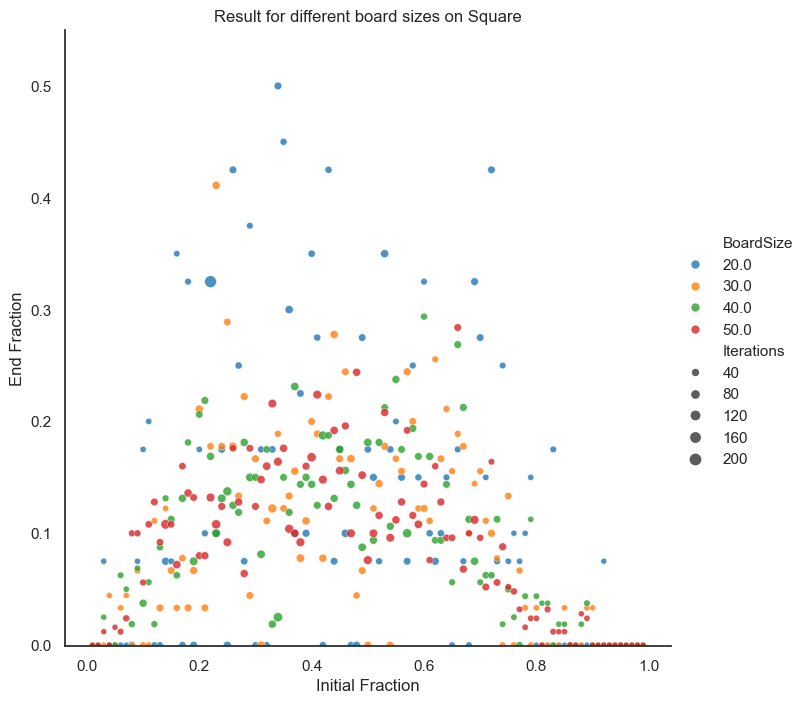

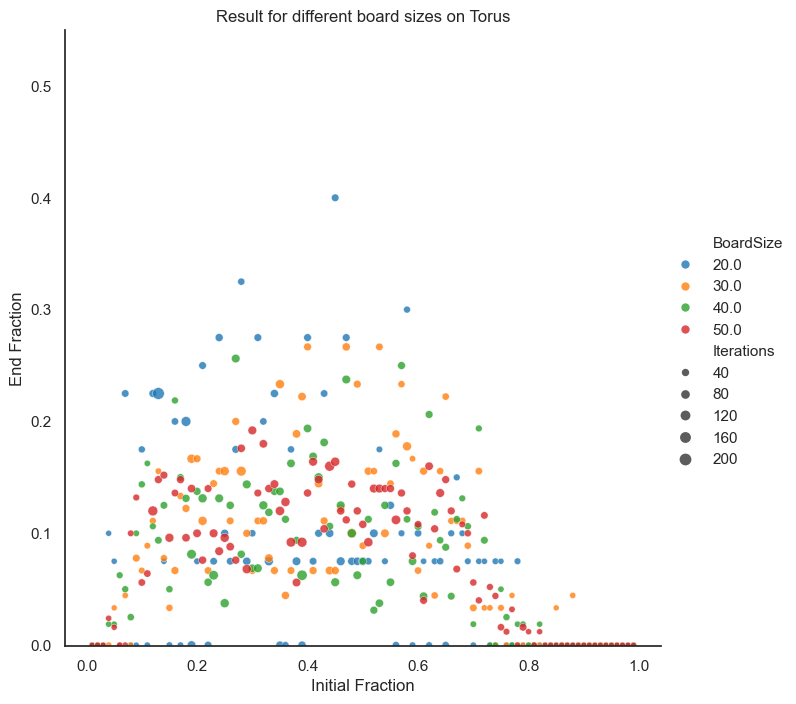

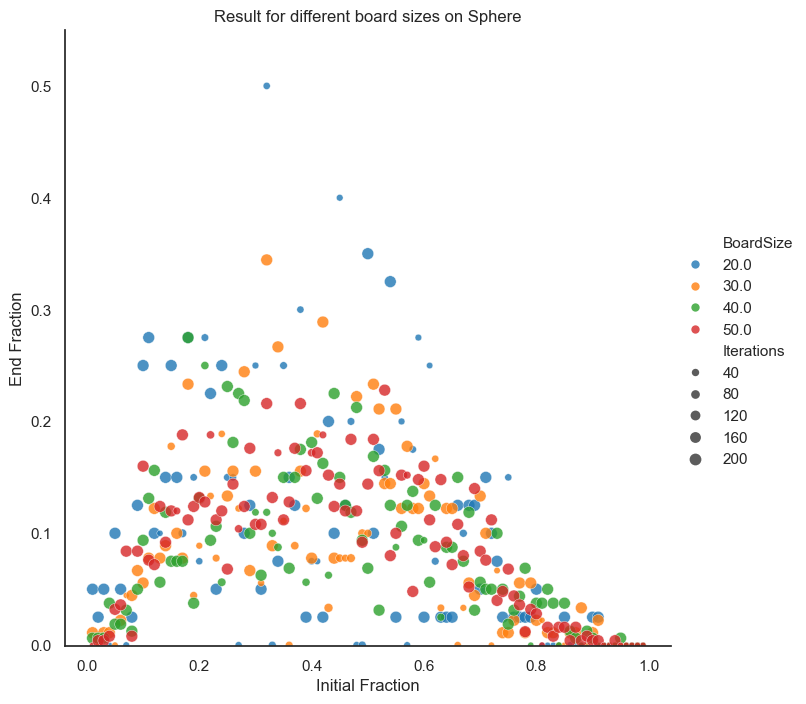

In [29]:
import seaborn as sns

sns.set_theme(style= 'white') 
save_path = '/Users/dilankaraguler/Desktop/ConwayProject/results:figures'

sns.relplot(x='InitialFraction', y='EndFraction', size='Iterations', hue= 'BoardSize',
            data = data_dict['square'], alpha=.8, palette="tab10",
           height=7, legend='brief')
#sns.regplot(x=data[:, 1], y=data[:, 3], scatter=False, ax=scatter_plot.ax)
plt.ylim(-0.001, 0.55)
plt.ylabel('End Fraction')
plt.xlabel('Initial Fraction')
plt.title('Result for different board sizes on Square')
#plt.savefig(f'{save_path}/squareresults.png')

sns.relplot(x='InitialFraction', y='EndFraction', size='Iterations', hue='BoardSize',
                             data=data_dict['torus'], alpha=.8, palette="tab10", height=7)
plt.ylim(-0.001, 0.55)
plt.ylabel('End Fraction')
plt.xlabel('Initial Fraction')
plt.title('Result for different board sizes on Torus')
#plt.savefig(f'{save_path}/torusresults.png')

sns.relplot(x='InitialFraction', y='EndFraction', size='Iterations', hue='BoardSize',
                             data=data_dict['sphere'], alpha=.8, palette="tab10", height=7)
plt.ylim(-0.001, 0.55)
plt.ylabel('End Fraction')
plt.xlabel('Initial Fraction')
plt.title('Result for different board sizes on Sphere')
#plt.savefig(f'{save_path}/sphereresults.png')
plt.show()


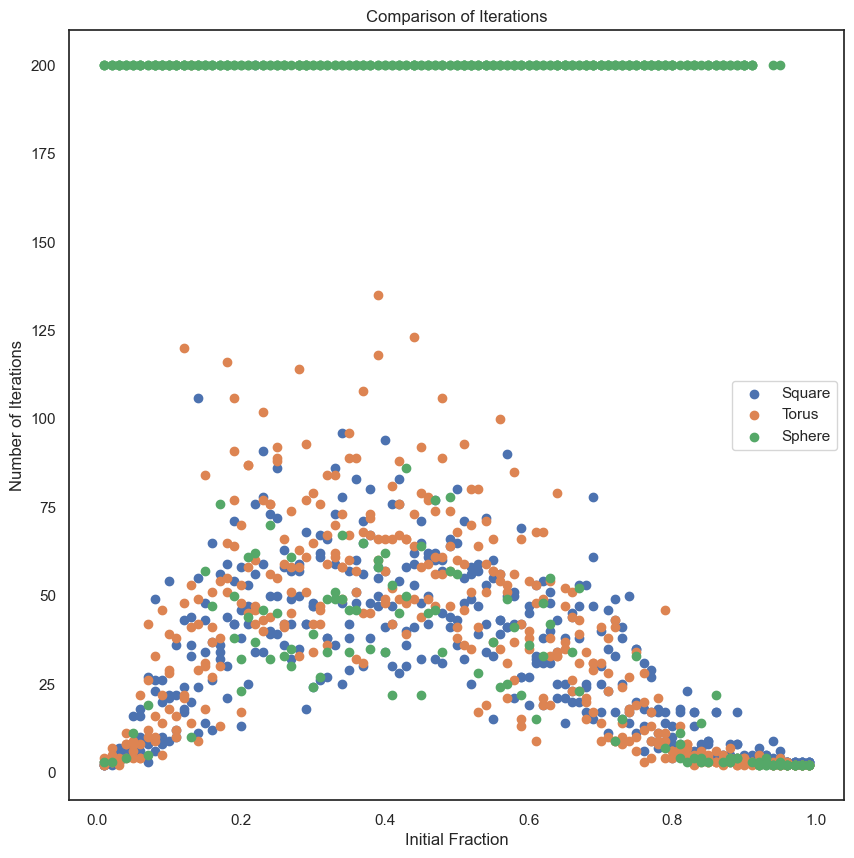

In [42]:
 fig = plt.figure(figsize=(10, 10))
    
plt.scatter(data_dict['square']['InitialFraction'],data_dict['square']['Iterations'], label='Square')
plt.scatter(data_dict['torus']['InitialFraction'],data_dict['torus']['Iterations'], label='Torus')
plt.scatter(data_dict['sphere']['InitialFraction'],data_dict['sphere']['Iterations'], label='Sphere')
plt.xlabel('Initial Fraction')
plt.ylabel('Number of Iterations')
plt.title('Comparison of Iterations')
plt.legend()
#plt.savefig(f'{save_path}/comparisonofiterations.png')


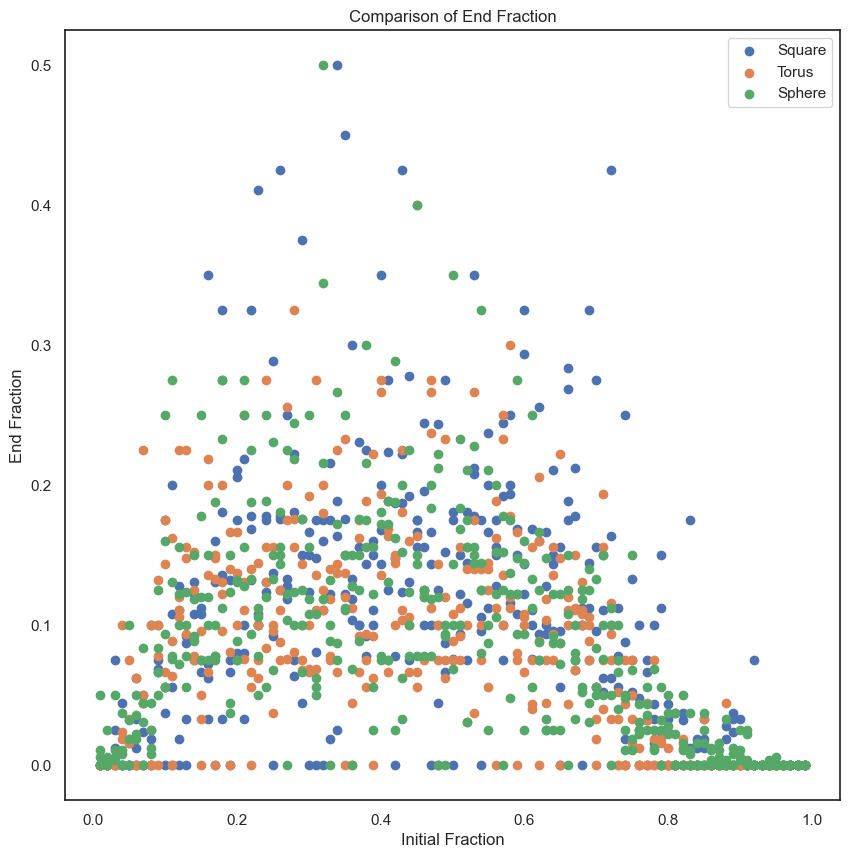

In [43]:
fig = plt.figure(figsize=(10, 10))
    
plt.scatter(data_dict['square']['InitialFraction'],data_dict['square']['EndFraction'], label='Square')
plt.scatter(data_dict['torus']['InitialFraction'],data_dict['torus']['EndFraction'], label='Torus')
plt.scatter(data_dict['sphere']['InitialFraction'],data_dict['sphere']['EndFraction'], label='Sphere')
plt.xlabel('Initial Fraction')
plt.ylabel('End Fraction')
plt.title('Comparison of End Fraction')
plt.legend()
#plt.savefig(f'{save_path}/comparisonofendfraction.png')
